## 1. Introduction:
**Here we want to talk about the subject matter domain, an overall take on what makes the topic interesting, and our research questions.** 


The United States has the highest incarcerated population in the world, with about 720 prisoners per 100,000 residents, according to the BBC. In 2018 the Department of Eduction found that the U.S. spends over $80 billion annually on corrections. They also found that, over the last 30 years, corrections spending has grown three times faster than education spending.

Crime reduction has long been a foundation of the U.S. corrections system, and a justification for its human and financial consequences. This analysis will address the question of whether or not incarceration leads to reduced crime.


## 2. Hypotheses: 
**Given our general research questions that are based on some interesting observation or outside trend, our next step is to formally state which hypotheses we want to test.88

Group A - states with increased incarceration/capita from 2001 to 2016 
<br>Group B - states with decreased incarceration/capita from 2001 to 2016 

_H_<sub>0</sub> : There is no significant difference between the average crimes/capita for states in Group A vs states in Group B. 
<br>_H_<sub>a</sub> : There is a significant difference between the average crimes/capita for states in Group A vs states in Group B. 


## 3. Data:
**Now that we have walked through the relevance of the topic, posed our research questions, and framed testable hypotheses based on those questions, it's time to introduce the dataset. Tell us about the data -- when and where was it collected? Perhaps include descriptive statistics or measures of distribution.**

The dataset focuses on crime and incarceration in the United States. It contains information for all 50 states, stretching from 2001 to 2016. Included are incarceration rates, crime rates by type, and state population. My background is in criminology and restorative justice, and I've previously looked at crime statistics across countries, but never by state. It will be interesting to see what patterns exist, both between states and within the same state over time.

**Include** calculations from first_yr, last_yr, from before calculating the annual difference. Should explain why I did it that way instead of looking at first year vs last year

In [1]:
# Set up environment

import math
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np
import scipy.stats as stats

In [2]:
data = pd.read_csv(r'C:\Users\catem\data-science-projects\capstones\experimental_design\crime_and_incarceration_by_state.csv')


# Convert column headers to lowercase for ease of coding
data.columns = data.columns.str.lower()


# Get basic overview of the data
print(data.shape)

data.info()
data.head()


(816, 17)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 816 entries, 0 to 815
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   jurisdiction            816 non-null    object 
 1   includes_jails          816 non-null    bool   
 2   year                    816 non-null    int64  
 3   prisoner_count          816 non-null    int64  
 4   crime_reporting_change  799 non-null    object 
 5   crimes_estimated        799 non-null    object 
 6   state_population        799 non-null    float64
 7   violent_crime_total     799 non-null    float64
 8   murder_manslaughter     799 non-null    float64
 9   rape_legacy             749 non-null    float64
 10  rape_revised            199 non-null    float64
 11  robbery                 799 non-null    float64
 12  agg_assault             799 non-null    float64
 13  property_crime_total    799 non-null    float64
 14  burglary                799 non-

,jurisdiction,includes_jails,year,prisoner_count,crime_reporting_change,crimes_estimated,state_population,violent_crime_total,murder_manslaughter,rape_legacy,rape_revised,robbery,agg_assault,property_crime_total,burglary,larceny,vehicle_theft
0,FEDERAL,False,2001,149852,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,ALABAMA,False,2001,24741,False,False,4468912.0,19582.0,379.0,1369.0,NaN,5584.0,12250.0,173253.0,40642.0,119992.0,12619.0
2,ALASKA,True,2001,4570,False,False,633630.0,3735.0,39.0,501.0,NaN,514.0,2681.0,23160.0,3847.0,16695.0,2618.0
3,ARIZONA,False,2001,27710,False,False,5306966.0,28675.0,400.0,1518.0,NaN,8868.0,17889.0,293874.0,54821.0,186850.0,52203.0
4,ARKANSAS,False,2001,11489,False,False,2694698.0,12190.0,148.0,892.0,NaN,2181.0,8969.0,99106.0,22196.0,69590.0,7320.0


## 4. Methods:
**Explain the steps needed to test the hypotheses. This includes any data wrangling, tests, and visualizations that you will need to definitively reject or fail to reject your null hypotheses.**

**Data wrangling:**

Removing entries for states who include jails in their prisoner count. Also removing entries for federal prisoners, as that data will not be used while comparing states.

In [3]:
# print(data.loc[data.includes_jails, 'includes_jails'].count())
data = data.loc[data.includes_jails == False]
data = data.loc[data.jurisdiction != 'FEDERAL']

Adding columns for percent of the state population incarcerated total crime and crime per capita per state year.

In [4]:
data['perc_incar'] = (data['prisoner_count'] / data['state_population']) * 100
data['total_crime'] = data['violent_crime_total'] + data['property_crime_total']
data['cri_per_cap'] = data['total_crime'] / data['state_population']
data.head()

,jurisdiction,includes_jails,year,prisoner_count,crime_reporting_change,crimes_estimated,state_population,violent_crime_total,murder_manslaughter,rape_legacy,rape_revised,robbery,agg_assault,property_crime_total,burglary,larceny,vehicle_theft,perc_incar,total_crime,cri_per_cap
1,ALABAMA,False,2001,24741,False,False,4468912.0,19582.0,379.0,1369.0,NaN,5584.0,12250.0,173253.0,40642.0,119992.0,12619.0,0.553625,192835.0,0.043150
3,ARIZONA,False,2001,27710,False,False,5306966.0,28675.0,400.0,1518.0,NaN,8868.0,17889.0,293874.0,54821.0,186850.0,52203.0,0.522144,322549.0,0.060778
4,ARKANSAS,False,2001,11489,False,False,2694698.0,12190.0,148.0,892.0,NaN,2181.0,8969.0,99106.0,22196.0,69590.0,7320.0,0.426356,111296.0,0.041302
5,CALIFORNIA,False,2001,157142,False,False,34600463.0,212867.0,2206.0,9960.0,NaN,64614.0,136087.0,1134189.0,232273.0,697739.0,204177.0,0.454162,1347056.0,0.038932
6,COLORADO,False,2001,17278,False,False,4430989.0,15492.0,158.0,1930.0,NaN,3555.0,9849.0,170887.0,28533.0,121360.0,20994.0,0.389936,186379.0,0.042063


Adding columns for violent crime and property crime rates for later analysis

In [5]:
data['vc_cap'] = data['violent_crime_total'] / data['state_population']
data['pc_cap'] = data['property_crime_total'] / data['state_population']

## 5.	Results:
**Now, we can walk through the results of the methods. State here the results of your tests and whether these results mean that you reject or fail to reject the null. Also, include compelling tables or graphs to illustrate your findings.**

In [6]:
# create a dataframe for each of the years we'll be looking at
first_year = data.loc[data.year == 2001].reset_index()
last_year = data.loc[data.year == 2016].reset_index()

# set up new dataframe for differences
diffs = pd.DataFrame(columns=['diff_incar'])
# create column with differences for percent incarcerated
diffs['diff_incar'] = last_year['perc_incar'] - first_year['perc_incar']

Sort records into groups based on which had increased incarceration rates and which had decreased rates between 2001 and 2016.

In [7]:
# set up a list to hold results
groups = []

# iterate through diff_incar
for i in diffs['diff_incar']:
    
    # append all significant positive changes to group as As
    if i > .01:
        group = 'A'
        groups.append(group)
    
    # append all sig neg changes as Bs
    elif i < -.01:
        group = 'B'
        groups.append(group)
    
    # append all insignificant changes as Cs
    else:
        group ='C'
        groups.append(group)

# add column for group designations for each record
diffs['group'] = groups

# diffs.head()

The way the data is broken up now, we only have 22 results in Group A and 18 results in Group B. This means we are under the minimum threshold for a t-test. 

In [8]:
print(diffs.loc[diffs.group == 'A', 'group'].count())
print(diffs.loc[diffs.group == 'B', 'group'].count())

22
18


Instead of continuing with this line of questions, I'll calculate the yearly differences in crime and incarceration rates for each state. This will give me a much larger sample size, and it will more accurately reflect fluctuations over the years between 2001 and 2016.

Creating a dataframe to hold each year's data.

In [9]:
yr_01 = data.loc[data.year == 2001].reset_index()
yr_02 = data.loc[data.year == 2002].reset_index()
yr_03 = data.loc[data.year == 2003].reset_index()
yr_04 = data.loc[data.year == 2004].reset_index()
yr_05 = data.loc[data.year == 2005].reset_index()
yr_06 = data.loc[data.year == 2006].reset_index()
yr_07 = data.loc[data.year == 2007].reset_index()
yr_08 = data.loc[data.year == 2008].reset_index()
yr_09 = data.loc[data.year == 2009].reset_index()
yr_10 = data.loc[data.year == 2010].reset_index()
yr_11 = data.loc[data.year == 2011].reset_index()
yr_12 = data.loc[data.year == 2012].reset_index()
yr_13 = data.loc[data.year == 2013].reset_index()
yr_14 = data.loc[data.year == 2014].reset_index()
yr_15 = data.loc[data.year == 2015].reset_index()
yr_16 = data.loc[data.year == 2016].reset_index()


Creating a function to perform calculations on the same column of data over different years.

In [10]:
yr_list = [yr_01, yr_02, yr_03, yr_04, yr_05, yr_06, yr_07, yr_08, yr_09, yr_10, 
          yr_11, yr_12, yr_13, yr_14, yr_15, yr_16]

def calc_diffs(years, new_column, old_column):
    '''
    Calculate the difference between the same column in different dfs and saves
    as a column.
    
    Args: 
        years - list of the dfs to be iterated
        new_column - name of column to store results
        old_column - name of columns to be compared
    '''
    x = -1
    
    # for each of the dataframes in the list
    for i in years:
        
        # skipping x = -1(years[-1]) for calculation
        if x != -1:
            # incar_vs_ly for that year = that year's perc incar - the year before's incar
            i[new_column] = i[old_column] - years[x][old_column]
            x += 1
        
        # years[-1] is the first year, so there is nothing to subtract from it 
        else:
            i[new_column] = 0
            x += 1

# calculate yearly diffs for incarceration and crime rates
calc_diffs(yr_list, 'incar_vs_ly', 'perc_incar')
calc_diffs(yr_list, 'cr_vs_ly', 'cri_per_cap')

# calculate yearly diffs for violent and property crime rates, for later analysis
calc_diffs(yr_list, 'viocr_vs_ly', 'vc_cap')
calc_diffs(yr_list, 'propcr_vs_ly', 'pc_cap')

# concatenate yearly dfs into master df
all_yrs = pd.concat(yr_list)

Dropping rows with null values for the fields we are measuring. There were two records dropped.

In [11]:
all_yrs.dropna(subset=['incar_vs_ly'], inplace=True)
#print(all_yrs.isnull().sum())

Breaking the data down into two groups based on records that had increased vs. decreased incarceration/capita each year. Excluding results for changes smaller than .005 to account for small annual fluctuations that are likely not attributed to policy

In [12]:
# set up a list to hold results
groups = []

# iterate through incar_vs_ly
for i in all_yrs['incar_vs_ly']:
    
    # append all significant positive changes to group as As
    if i > .005:
        group = 'A'
        groups.append(group)
    
    # append all sig neg changes as Bs
    elif i < -.005:
        group = 'B'
        groups.append(group)
    
    # append all insignificant changes as Cs
    else:
        group ='C'
        groups.append(group)

# add column for group designations for each record
all_yrs['group'] = groups

Unlike before, our samples are now large enough to conduct tests on. 

In [13]:
print(all_yrs.loc[all_yrs.group == 'A', 'group'].count())
print(all_yrs.loc[all_yrs.group == 'B', 'group'].count())

208
217


Creating dataframes for groups A and B. Group C, states with little or no change in incarceration rates, will be excluded, as explained above.

In [14]:
incar_up = all_yrs.loc[all_yrs.group == 'A'].reset_index()
incar_down = all_yrs.loc[all_yrs.group == 'B'].reset_index()

**Testing for normality: (And other assumptions for t-test)**
 Following normality testing, an appropriate statistical test will be run to determine whether or not there is a significant difference in the population means of the two groups. If, at this point, the null hypothesis can be rejected, a confidence interval will be calculated to determine the substantive value of the findings. 

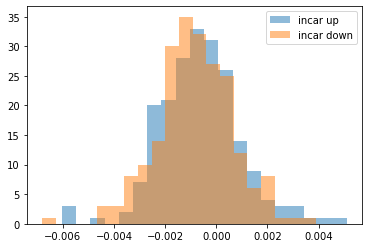

In [15]:
plt.hist(incar_up['cr_vs_ly'], alpha = .5, bins = 20)
plt.hist(incar_down['cr_vs_ly'], alpha=.5, bins = 20)

plt.legend(['incar up', 'incar down'], loc='upper right')
plt.show()

Visual inspection of the histogram suggests normal distribution. Looking at skew and kurtosis and conducting a Shapiro-Wilk test to check.

In [16]:
# Define a function to print information to determine data distribution
def test_normal(col_name):
    print(stats.describe(incar_up[col_name]))
    print(stats.describe(incar_down[col_name]))

    print(stats.shapiro(incar_up[col_name]))
    print(stats.shapiro(incar_down[col_name]))
    
test_normal('cr_vs_ly')

DescribeResult(nobs=208, minmax=(-0.006040262610664433, 0.005089793393149689), mean=-0.0006276752227524176, variance=2.620765514087566e-06, skewness=0.14594721239733888, kurtosis=1.6886376908299274)
DescribeResult(nobs=217, minmax=(-0.0068088211850503705, 0.0038883897332420564), mean=-0.0008271227993088372, variance=2.19429963169641e-06, skewness=-0.1453284859827845, kurtosis=1.0738661759189538)
ShapiroResult(statistic=0.9733427166938782, pvalue=0.0005542985745705664)
ShapiroResult(statistic=0.9897196292877197, pvalue=0.12456328421831131)


Based on these results, we cannot reject the null hypothesis for incar_up. We can, however, reject the null hypothesis that the incar_down data follows a normal distribution. 

Since parametric tests require both distributions to be normal, I'll use the Kruskal Wallis test to check for a significant difference in means between the groups. 

In order to find a significant difference, we need a H-statistic of more than 3.84 (the Chi-square critical value for 1 degree of freedom and &alpha; of .05).

In [17]:
stats.kruskal(incar_up['cr_vs_ly'], incar_down['cr_vs_ly'])

KruskalResult(statistic=1.3911315286256922, pvalue=0.23821410447448801)

Based on these results, we cannot reject the null hypothesis. A statistically significant difference was not found between the average crime rate in states with annual increases in incarceration vs states with annual decreases in incarceration.

### Comparing with violent crime and property crime

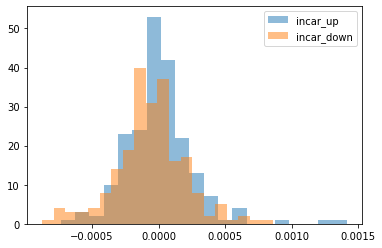

In [18]:
plt.hist(incar_up['viocr_vs_ly'], alpha = .5, bins = 20)
plt.hist(incar_down['viocr_vs_ly'], alpha = .5, bins = 20)

plt.legend(['incar_up', 'incar_down'], loc='upper right')

plt.show()

In [19]:
test_normal('viocr_vs_ly')

DescribeResult(nobs=208, minmax=(-0.0007348343344060655, 0.0014134939072755594), mean=7.030698338616196e-06, variance=6.940041158265092e-08, skewness=1.373390931092426, kurtosis=5.977155370929006)
DescribeResult(nobs=217, minmax=(-0.0008754972033579557, 0.0008586642969142136), mean=-6.03457339861676e-05, variance=6.971009991138278e-08, skewness=-0.00905891665941681, kurtosis=1.2129492046544756)
ShapiroResult(statistic=0.9095055460929871, pvalue=6.041434574832749e-10)
ShapiroResult(statistic=0.9795303344726562, pvalue=0.0030384226702153683)


In [20]:
stats.kruskal(incar_up['viocr_vs_ly'], incar_down['viocr_vs_ly'])

KruskalResult(statistic=6.071266931614218, pvalue=0.013739837258258798)

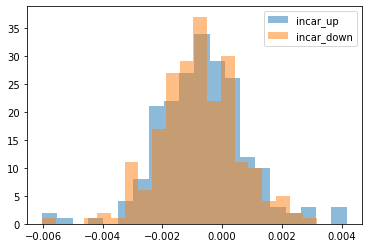

In [21]:
plt.hist(incar_up['propcr_vs_ly'], alpha = .5, bins = 20)
plt.hist(incar_down['propcr_vs_ly'], alpha = .5, bins = 20)

plt.legend(['incar_up', 'incar_down'], loc='upper right')

plt.show()

In [23]:
test_normal('propcr_vs_ly')

DescribeResult(nobs=208, minmax=(-0.006027360130949289, 0.004164897943563936), mean=-0.0006347059210910339, variance=2.2690780318605953e-06, skewness=0.051227732432875345, kurtosis=1.6762364631419393)
DescribeResult(nobs=217, minmax=(-0.0060225897270877946, 0.003176949791984251), mean=-0.0007667770653226695, variance=1.7786514246450666e-06, skewness=-0.1169485735197065, kurtosis=0.9175901728050677)
ShapiroResult(statistic=0.9734957218170166, pvalue=0.0005808107671327889)
ShapiroResult(statistic=0.9905622601509094, pvalue=0.1698160618543625)


In [24]:
stats.kruskal(incar_up['propcr_vs_ly'], incar_down['propcr_vs_ly'])

KruskalResult(statistic=0.7758867098370956, pvalue=0.3784020896668694)

## 6. Discussion & recommendations:

**What insights can interested parties get from this research? What would you recommend as further research?**

These findings will help policy makers and elected officials make informed decisions when allocating money for corrections and when handling issues of criminal justice reform. Political hopefulls can use these findings to inform their campaign's approach to crime.

**Limitations of the study:** 

Bias in assignment to conditions: Since it is impossible to randomly select which states would belong to the test and control group, there are many variables we cannot control for. We cannot really assume ceteris paribus in this case. For these same reasons, it is not possible to conduct an A/A test on this group.